### 3. Home credit default risk
- Start Here: A Gentle Introduction

1. 소개
    - 이 노트는 초심자를 위해 만들어졌으므로 복잡한 모델이나 많은 데이터 결합을 피한다.


2. 대회 목적
    - 과거의 대출 신청 데이터를 이용하여 신청자가 대출을 상환할 수 있는지 예측한다.


3. Binary classification
    - 상환=0, 상환 못함=1


4. Data
 - application_train/application_test
   : 각 대출 신청 정보
 - bure
   : 다른 금융기관의 고객의 예전 신용
 - bure_balance
   : 예전 신용도 월별 데이터
 - previous_application
   : 예전 대출 신청
 - POS_CASH_BALANCE
   : 예전 대출 신청 월별 데이터
 - credit_card_balance
   : 신용카드 월별 데이터
 - installments_payment
   : 예전 대출 지불 내역







#### 1. Imports

In [65]:

import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read in data

In [66]:
print(os.listdir("./inputdata/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


이용 가능한 파일 리스트들을 확인한다. 
확인 후에는 training data, testing data 순으로 불러온다.

In [67]:
app_train=pd.read_csv('./inputdata/application_train.csv')
print('Training data shape: ', app_train.shape)
#.shape 몇*몇 행렬로 이루어져 있는지 나타내기
app_train.head()
#위에 5줄만 확인


Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


트레이닝 데이터는 307511개의 관찰값을 가지고 traget 포함 122개의 feature가 있다.

In [68]:
app_test=pd.read_csv('./inputdata/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트 데이터는 48744개의 행이 있고 열은 트레이닝 데이터에서 target이 빠져서 121개 있다.

#### 3. Exploratory Data Analysis
- EDA는 데이터 내에서의 추세, 이상징후, 패턴, 관계 등을 알아낸다. 이 과정에서 흥미로운 영역이 생긴다면 특정 영역으로 좁혀서 분석할 수 있다.

#### 3.1. Examine the Distribution of the Target Column
- 일단 각 category에 속하는 대출의 수를 조사한다.

In [69]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

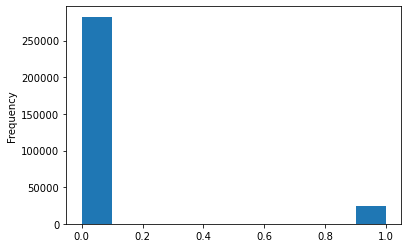

In [70]:
app_train['TARGET'].astype(int).plot.hist();
#astype(int) 배열의 모든 요소를 정수로 변환한다.
#plot.hist 히스토그램 그래프를 그린다.

- 이 그래프를 보면 상환한 대출이 미상환 대출보다 훨씬 많으므로 불균형한 class문제임을 알 수 있다. 불균형을 반영하기 위해 가중치를 붙일 수 있다. 

#### 3.2.Examine Missing Values
- 결측치의 수와 비율을 확인한다.    


In [71]:
#결측치를 계산하기 위해 함수를 만든다.
def missing_values_table(df):
    #총 결측치
    mis_val=df.isnull().sum()

    #결측치 비율
    mis_val_percent =100*df.isnull().sum()/len(df)

    #결과로 표 만들기
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)

    #열 이름 다시짓기
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)
    #여긴 아직 이해 못한듯

    # 요약 정보 print하기
    print("Your selected dataframe has "+str(df.shape[1])+" columns.\n" "There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values")

        #결측치 dataframe을 return

    return mis_val_table_ren_columns










- 여기서 IndentationError: unexpected indent 에러가 생겼는데 들여쓰기를 잘못하면 생기는 에러라고 한다.  
- 또한 아래에서 함수를 실행하려고 했을 때, UnboundLocalError: local variable 'mis_val_table_ren_columns' referenced before assignment 에러가 발생하였는데 이는 mis_val_table_ren_columns에 대해 지정해주는 줄을 빠뜨려서 에러가 생겼다.
- 그대로 따라했더니 Your selected dataframe has (a,122) 이런식으로 나왔다. 그래서 df.shape ->df.shape[1]로 수정해주었다.

In [72]:
#결측치 통계량
missing_values=missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


- 머신러닝 모델을 만들 때는 이런 결측치를 채워야 한다. 이후 결측치 처리를 위해 XGBoost 모델을 이용할 것이다. 결측치 비율이 높은 열을 삭제할 수도 있지만 도움이 될 수도 있기 때문에 일단 유지한다

#### 3.3.Column Types
- 각 데이터유형의 열 수를 알아본다. 

In [73]:
#타입별 column 수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [74]:
#object column에서 각 class의 수
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- 이런 categorical variable을 다루는 방법을 찾자!

#### 4.Encoding Categorical Variables
- 머신러닝 모델은 categorical variable를 처리할 수 없으므로 이 변수들을 숫자로 인코딩한다. 두 가지 방법이 있다.

1. Label encoding
 : 각 category를 정수로 할당한다. ex)CEO=0, 매니저=1, 사원=2
2. One-hot encoding
 : 하나의 1과 나머지0으로 이루어진 벡터를 할당한다. ex)CEO=[100], 매니저=[010], 사원=[001]
3. 둘 중에 무엇을 고를 것인가?
- Label encoding은 우리가 원하지 않는 가중치를 할당할 수도 있다. category가 두 개만 있는 경우는 괜찮지만 두 개를 초과할 경우 one-hot encoding이 안전하다.
- one-hot encoding의 단점은 feature의 수가 폭발적으로 증가할 수 있다. 이 문제를 해결하려면 PCA와 같은 차원 축소 방법을 이용해야 한다.
- 이 노트에서는 category가 2개 이하일 때 label encoding을 이용하고 2개를 초과하면 one-hot encoding을 이용한다. (또한 차원 축소는 이용하지 않는다.)

##### 4.1 Label Encoding and One-Hot Encoding
- category가 2개 이하일 때 label encoding을 이용하고 2개를 초과하면 one-hot encoding을 이용한다.
- label encoding은 Scikit-Learn LabelEncoder를 이용한다.
- one-not encoding은 pandas get_dummies(df)를 이용한다.

In [84]:
#label endoder object 만들기
le = LabelEncoder()
le_count = 0

#column 사이를 반복한다.
for col in app_train:
    if app_train[col].dtype == 'object':
        # 만약 unique category가 2개 이하면
        if len(list(app_train[col].unique())) <= 2:
            # 트레이닝 데이터 연습
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


0 columns were label encoded.


In [85]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 240)


##### 4.2.Aligning Training and Testing Data
- training 과 testing에 모두 동일한 feature(column)이 있어야 한다. training data에서 tesing data에 없는 열을 추출한다. 
- 열을 기준으로 데이터 프레임을 정렬하도록 axis=1 설정한다.

- 밑에서 app_train['TARGET']에서 KeyError: 'TARGET'에러가 났는데, 처음부터 다시 다 실행해보니까 해결되었다.(?) 

In [86]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 240)


- training data와 testing data는 같은 feature가 있다. 이제 머신러닝 가능하다.
- feature 수가 크게 증가하여 언젠가는 차원 축소가 필요할 수도 있다.

#### 5.Back to Exploratory Data Analysis

#### 5.1.Anomalies
- 데이터 내의 이상 현상을 찾아보자. decscribe method에서 column의 통계를 보면 된다.
- DAYS_BIRTH column의 숫자는 현재 대출 신청과 비교하여 기록되므로 음수이다. 이 통계량을 년 단위로 보려면 -1을 곱하고 1년의 일 수(365)로 나누면 된다. 

In [87]:
(app_train['DAYS_BIRTH']*(-1) / 365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

- 딱히 DAYS_BIRTH에서 특이값은 보이지 않는다.

In [88]:
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

- 최대값에서 특이값이 존재하는 것처럼 보인다. 그래프를 그려보자.

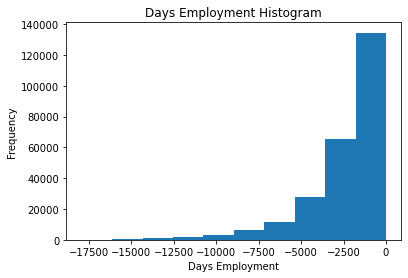

In [89]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

- 최대값이 특이값이다!
- 그렇다면 각 부분을 나눠서 채무 불이행의 비율이 어떤지 보자.

In [90]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


- 특이값에서 채무 불이행 비율이 낮다.
- 안전한 방법은 특이값을 결측값으로 설정하고 머신러닝 전에 imputation을 이용하여 채우는 것이다.
- 해결방법으로 우리는 특이값을 숫자 대신 이것이 특이값인지 나타내는 새 boolean column으로 채울 것이다.

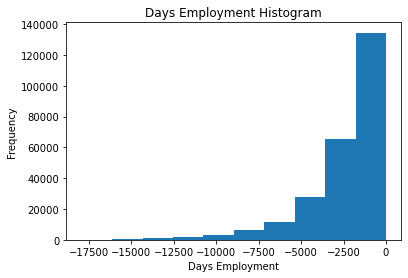

In [91]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

- 휴. 여기서도 오류가 났었는데 np를 define한적이 없다고 했다. 알고보니 내가 위에서 import할때 numpy as mp라고 오타를 냈던거였다.
- 이렇게 만들고 나니 우리의 예상과 일치한다.
- 특이값이 비정상이라는 것을 알리기 위해 새 열을 만들었다.
- 다른 열들은 뚜렷한 특이치가 없다.
- training data에 수행한 작업은 testing data에도 적용해야 한다.

In [92]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 0 anomalies in the test data out of 48744 entries


#### 3.5. Correlations
- categorical variable과 outlier를 다루었으므로 다시 EDA로 돌아가자.
- .corr라는 dataframe method를 이용해서 피어슨 상관 계수를 구할 수 있다.
- 상관계수 절대값에 대한 일반적인 해석:
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong

In [93]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Negati

- DAYS_BIRTH 가 제일 큰 양의 상관관계이다. 
- DAYS_BIRTH 는 대출 당시 고객의 나이를 -날짜로 나타낸다. 이 feature의 값이 음수이므로 고객의 나이가 들수록 채무 불이행 가능성이 줄어든다.(마이너스가 정비례함.)
- 헷갈리기 때문에 feature의 절댓값을 구해서 correlation를 음수로 만들자.

##### 3.5.1. Effect of Age on Repayment

In [94]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

- 나이가 들수록 대출금을 상환하는 경우가 많아짐을 좀 더 쉽게 볼 수 있다.

- 먼저 나이로 히스토ㄱ램을 만들어서 이 변수를 좀 더 살펴보자.

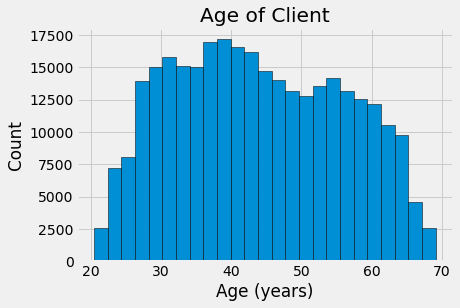

In [95]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

- outlier가 없다.
- age가 target에 미치는 영향을 시각화하자. 
- target값마다 다르게 색칠된 kernel density estimation plot(KDE)를 만들 것이다. 
- 각 데이터 지점에서 kernel(가우스)를 계산하고 평균내서 single smmoth curve를 만든다. 
- Seaborn kdeplot을 이용한다.

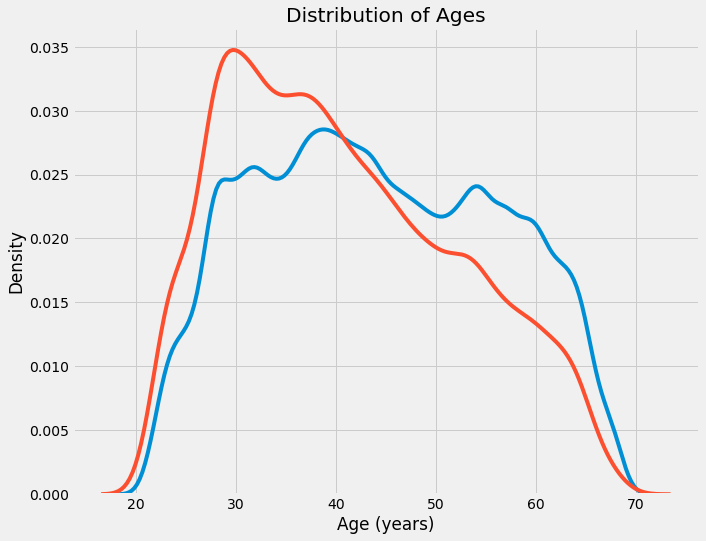

In [97]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

- 음.. 왜 난 오른쪽 위에 각 색깔에 대한 label이 안나오지? 파란색은 target==0 이고 빨간색은 target==1이다.
- target==1은 왼쪽 끝으로 치우친다. 
- 연령대별 대출금 미상환 평균을 구하자.
- 나이를 5년 단위로 자르고 각 단위별로 평균값을 구한다.
- 그럼 연령대별 미상환 대출의 비율을 알 수 있다.

In [98]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


- 먼저 5년 단위로 나누어서 표현하자.

In [99]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


- 그 다음 각 연령대별 대출 미상환 비율을 구하자.
- 그래프로 나타내보자.

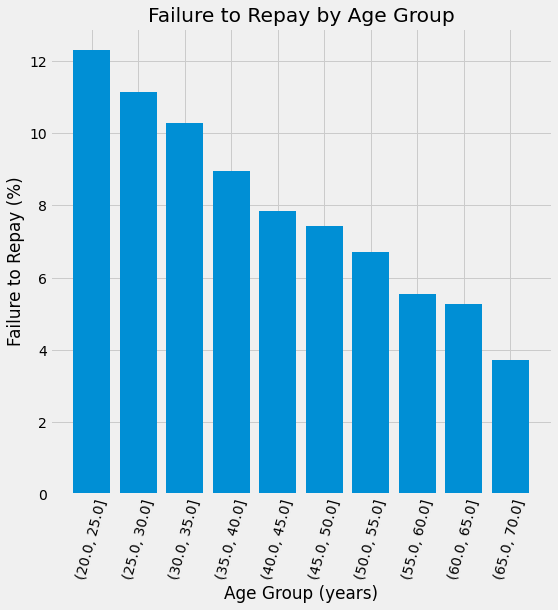

In [100]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

- 그래프를 보면 분명히 어린 대출 신청자들이 대출금 미상환 비율이 높다.
- 은행은 어린 고객들에게 더 많은 안내와 재정계획을 제공해서 예방조치를 취해야 한다.

##### 3.5.2. Exterior Sources
- target과 가장 큰 음의 상관관계를 갖는 변수는 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 이다. 
- 수많은 데이터 source를 이용해 만든 누적 신용등급같은 의미로 추정된다.
- 이를 살펴보자.
- 먼저 EXT_SOURCE feature와 target 사이의 상관관계를 보자.

In [101]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


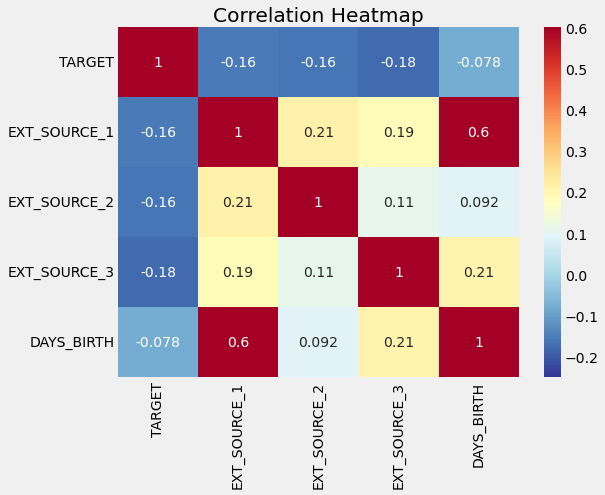

In [102]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


- EXT_SOURCE feature가 target과 음의 상관관계를 가진다.
- 이는 EXT_SOURCE 값이 증가하면 대출 상관 가능성이 높아진다는 것을 나타낸다.
- target값에 따라 각 feature의 분포를 시각화하여 살펴보자.

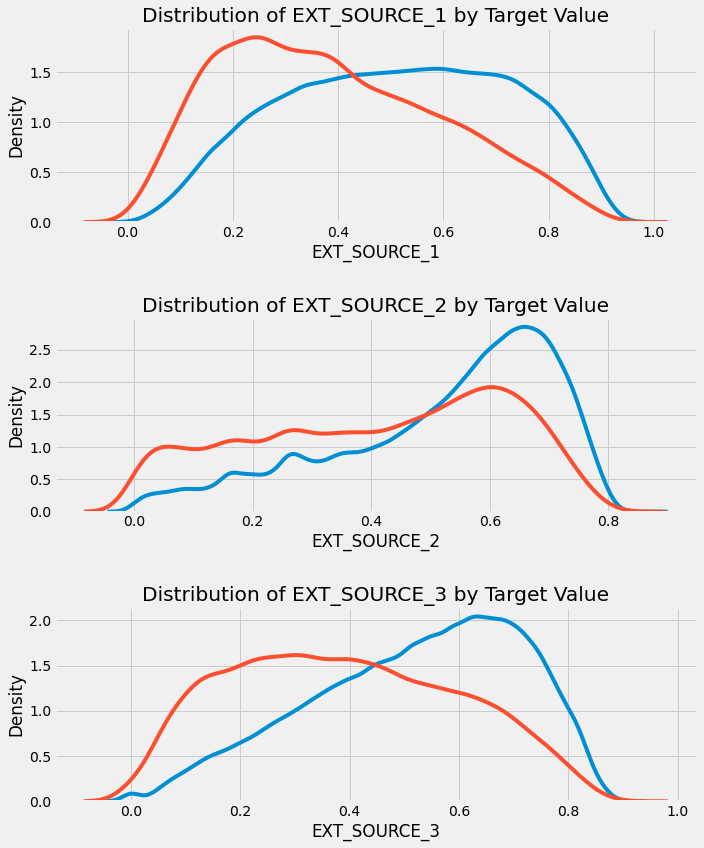

In [103]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

- 여기서도 라벨링이 안됨.. 왜 그러니 ㅠㅠ
- EXT_SOURCE_3는 TARGET과 가장 큰 차이가 난다.
- 이는 머신러닝 모델에서 신청자가 대출금을 제때 상환할지 예측에 유용하다.

##### 3.5.3. Pairs Plot
- 최종 exploratory plot으로 EXT_SOURCE 변수와 DAYS_BORT 변수의 pair plot을 만들 수 있다.
- Pair plot은 여러 변수 쌍 간의 관계를 확인할 수 있다.
- Seaborn과 PairGrid를 이용하여 산점도, 히스토그램, kernel density plot, 상관계수 plot을 만든다.

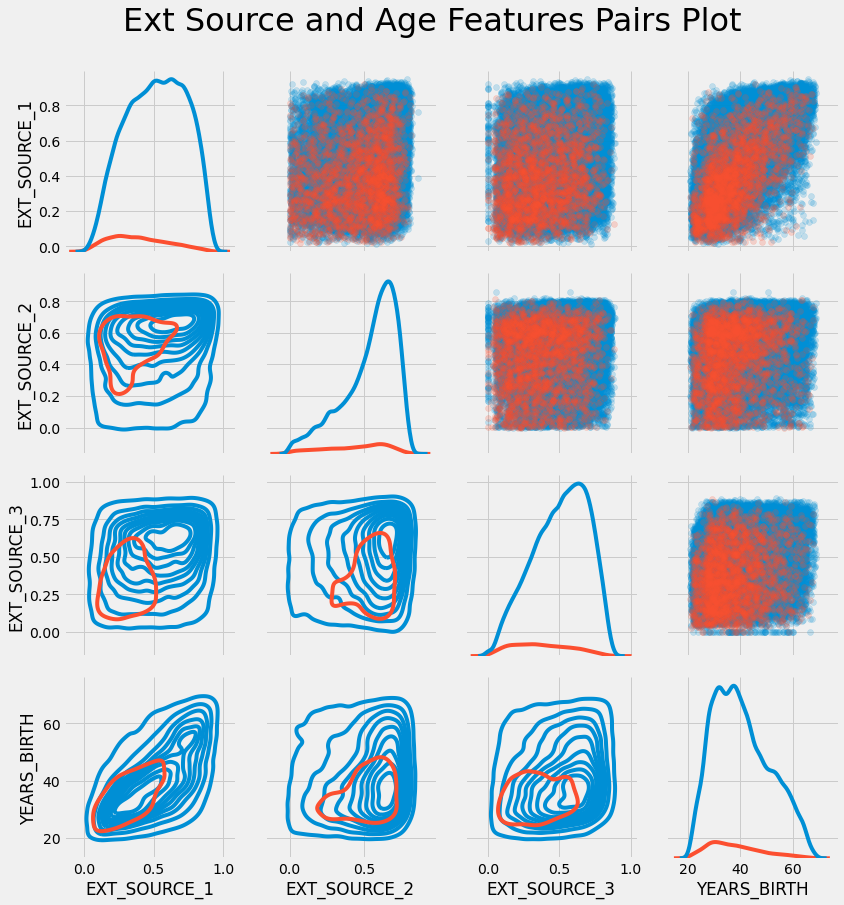

In [104]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

- 이해 못한것 같은데 이해 못해도 된다고 하니까 일단 스킵..
- 빨간색은 미상환 대출금, 파란색은 상환 대출금이다.
- EXT_SOURCE_1과 DAYS_BIRTH 사이에 양의 선형관계가 있다.

#### 5. Feature Engineering
- feature engineering은 construction과 selection을 포함한다.
- feature construction: 기존 데이터로부터 새로운 feature 추가
- feature selection: 중요한 feature만 고르거나 차원 축소
- 여기서는 간단한 feature construction 방법인 Polynomial features와 Domain knowledge features를 이용하겠다.

##### 5.1. Polynomial Features
- 

In [108]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

- cannot import name 'Imputer' from 'sklearn.preprocessing' 라는 오류가 떴는데 버전을 다시 설정해야한다고 한다. 그래서  from sklearn.impute import SimpleImputer 로 써서 해결해주었다.


In [109]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [110]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [111]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [112]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


##### 5.2. Domain Knowledge Features

In [113]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

##### 5.2.1 Visualize New Variables

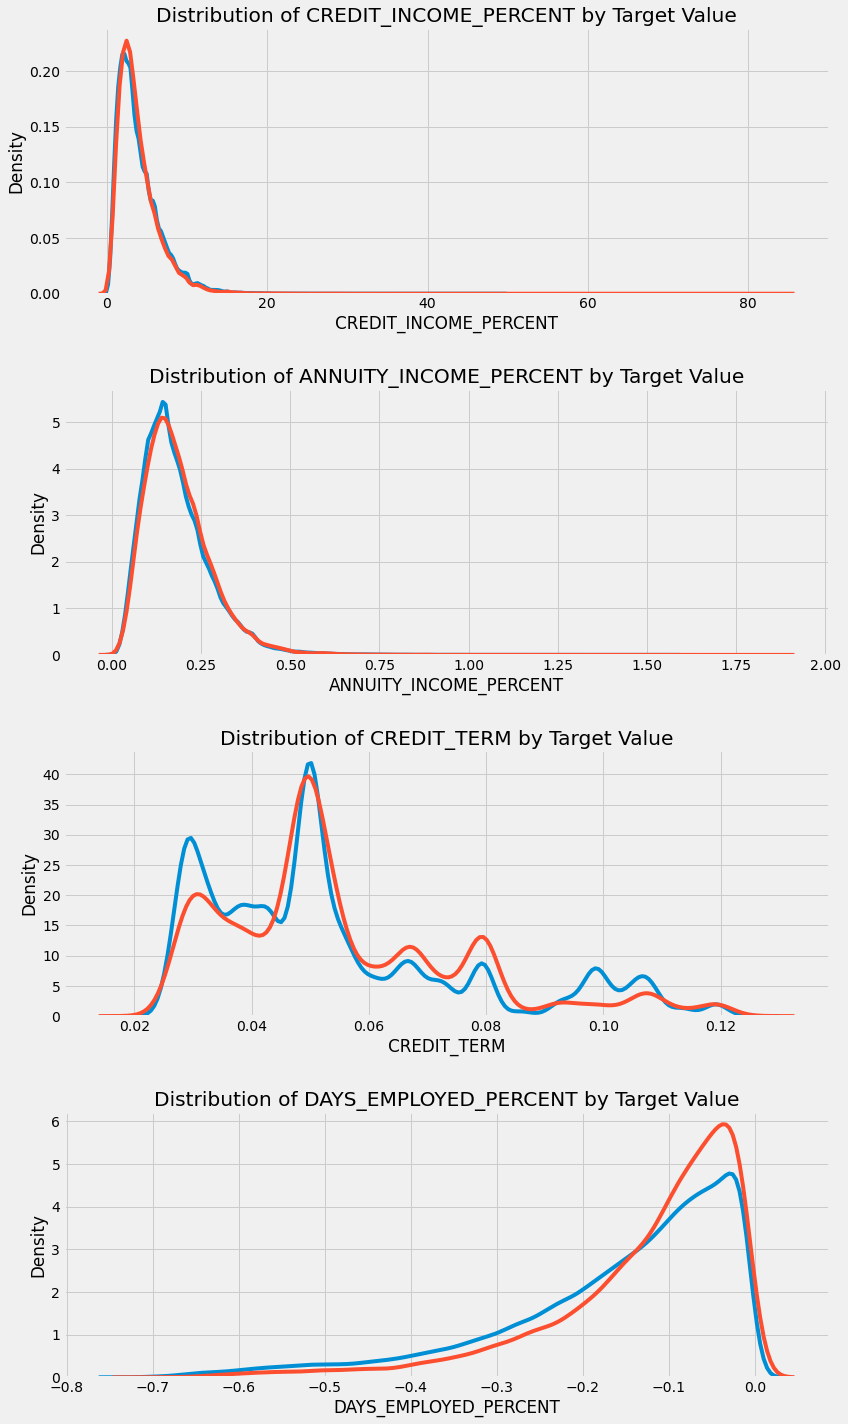

In [114]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### 6. Baseline

##### 6.1.Logistic Regression Implementation 